# Example notebook for the ATOM pipeline
---------------------------------

Load the data with one of the three imported datasets before running the
ATOM function. These datasets are provided by sklearn and are very small
and easy to learn. You can learn more about these datasets
at https://scikit-learn.org/stable/datasets/index.html.

    load_breast_cancer: binary classification
    load_wine: multi-class classification
    load_boston: regression

In [23]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston, load_wine, load_breast_cancer
from atom.atom import ATOMClassifier

# Load the dataset's features and targets
dataset = load_wine()

# Convert to pd.DtaFrame to get the names of the features
data = np.c_[dataset.data, dataset.target]
columns = np.append(dataset.feature_names, ["target"])
data = pd.DataFrame(data, columns=columns)
X = data.drop('target', axis=1)
y = data['target']

## Run ATOM pipeline

In [24]:
# Call ATOMclass for ML task exploration
atom = ATOMClassifier(X, Y, n_jobs=-1, verbose=3)

# Fit the pipeline with the selected models
atom.pipeline(models=['LDA','RF', 'lSVM'],
              metric='f1_macro',
              max_iter=4,
              init_points=3,
              cv=3,
              bagging=10)

<<=============== ATOM ===============>>
Parallel processing with 4 cores.
Initial data cleaning...
Algorithm task: multiclass classification. Number of classes: 3.

Dataset stats ===================>
Shape: (178, 14)
Scaled: False
----------------------------------
Size of training set: 124
Size of test set: 54
----------------------------------
Instances in target per class:
|    |    total |    train_set |    test_set |
|---:|---------:|-------------:|------------:|
|  0 |       59 |           43 |          16 |
|  1 |       71 |           47 |          24 |
|  2 |       48 |           34 |          14 |


Running pipeline =================>
Models in pipeline: LDA, RF, lSVM
Metric: f1_macro


Running BO for Linear Discriminant Analysis...
Initial point: 1 --------------------------------
Parameters --> {'solver': 'lsqr', 'shrinkage': 1.0}
Evaluation --> f1_macro: 0.7295
Time elapsed: 0.020s   Total time: 0.020s
Initial point: 2 --------------------------------
Parameters --> {'solv

## Analyze results

In [25]:
atom.results

,model,total_time,score_train,score_test,fit_time,bagging_mean,bagging_std,bagging_time
0,LDA,1.063s,1.0,0.963912,0.070s,0.918985,0.041234,0.033s
1,RF,12.638s,1.0,0.927338,5.769s,0.920495,0.021805,2.925s
2,lSVM,0.354s,1.0,0.963285,0.049s,0.960192,0.022506,0.033s


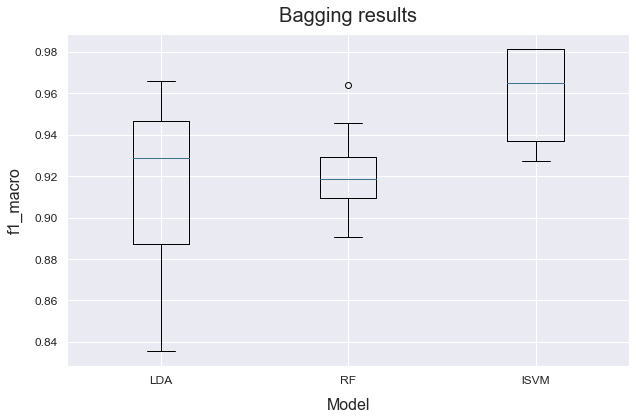

In [26]:
atom.plot_bagging()

## Let's have a closer look to the Random Forest

In [27]:
# Get the results on some other metrics
print('Jaccard score:', atom.rf.jaccard_weighted)
print('Recall score:', atom.rf.recall_macro)

Jaccard score: 0.8627450980392157
Recall score: 0.9444444444444445


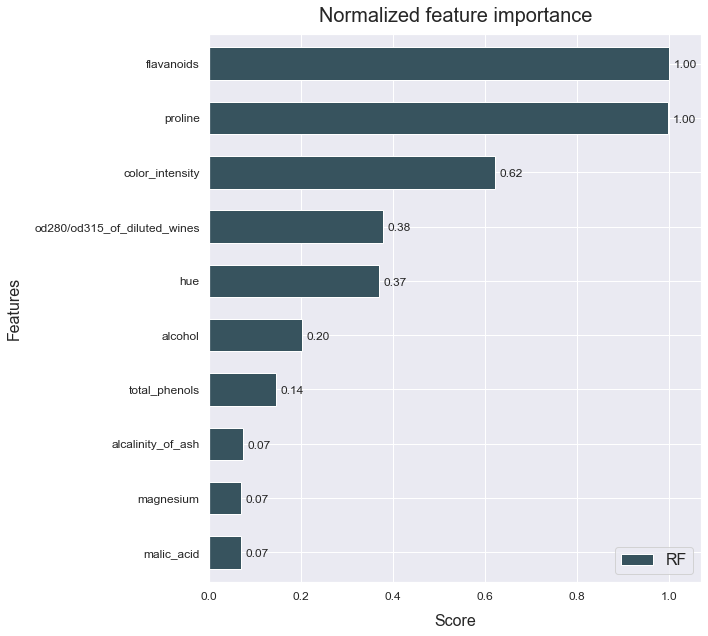

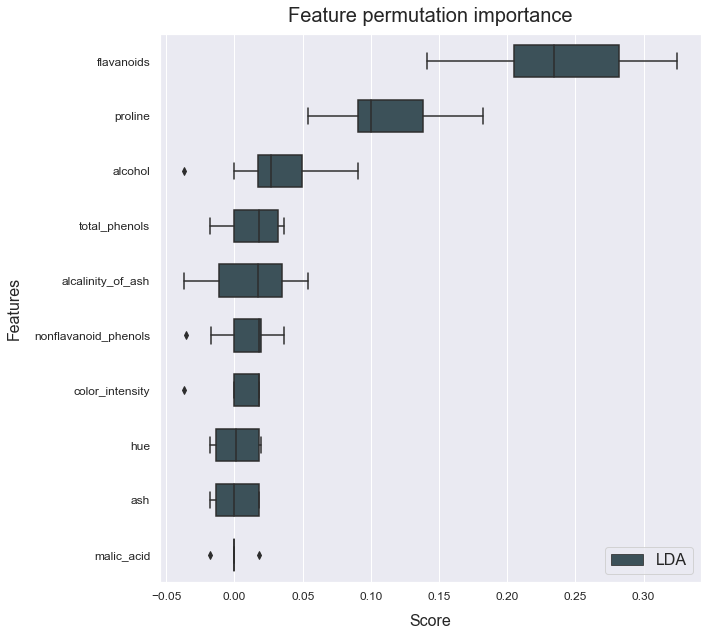

In [29]:
# Plot the feature importance and compare it to the permutation importance of the LDA
atom.rf.plot_feature_importance(show=10)
atom.lda.plot_permutation_importance(show=10)

In [32]:
# Save the random forest class for production
atom.RF.save('Random_Forest_class')

Random Forest model subclass saved successfully!
